HUNTER DAWLEY

FINAL CODE FOR NLP FINAL PAPER


In [3]:
#packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install torch
import spacy
from spacy import displacy

from scipy.stats import pointbiserialr
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

import string
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

**Read in Data and Investigate Basic Counts**

In [8]:
final_df = pd.read_csv('final_df.csv')

In [ ]:
final_df.head()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          867 non-null    object
 1   President     867 non-null    object
 2   Party         867 non-null    object
 3   Speech Title  867 non-null    object
 4   Transcript    867 non-null    object
 5   Decade        867 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 40.8+ KB


In [ ]:
#how many addresses did each president give?
president_counts = final_df['President'].value_counts()
print(president_counts)

President
Lyndon B. Johnson        71
Ronald Reagan            59
Barack Obama             50
Franklin D. Roosevelt    49
John F. Kennedy          44
George W. Bush           39
Bill Clinton             39
Woodrow Wilson           33
Ulysses S. Grant         32
Andrew Johnson           31
Grover Cleveland         30
Herbert Hoover           30
Andrew Jackson           26
James K. Polk            25
Benjamin Harrison        23
George H. W. Bush        23
Richard M. Nixon         23
Jimmy Carter             22
Theodore Roosevelt       22
Harry S. Truman          19
Donald Trump             19
Warren G. Harding        18
Rutherford B. Hayes      16
Franklin Pierce          15
Abraham Lincoln          15
William McKinley         14
Gerald Ford              14
James Buchanan           14
Calvin Coolidge          12
William Taft             12
Chester A. Arthur        11
Martin Van Buren         10
Dwight D. Eisenhower      6
James A. Garfield         1
Name: count, dtype: int64


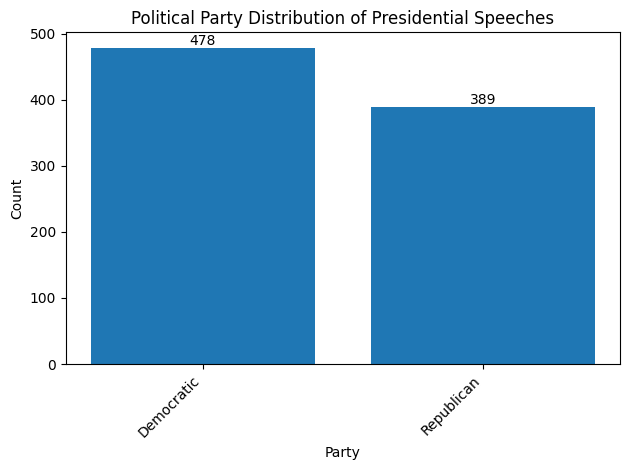

In [ ]:
#visualize!
# Create a bar graph of the political party distribution
party_counts1 = final_df['Party'].value_counts()

# Plotting the bar graph
plt.bar(party_counts1.index, party_counts1.values)
plt.title('Political Party Distribution of Presidential Speeches')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# add count to top of each bar
for i, count in enumerate(party_counts1.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [10]:
#check for any missing values
final_df.isnull().sum()

Date            0
President       0
Party           0
Speech Title    0
Transcript      0
Decade          0
dtype: int64

In [11]:
#how many speeches took place after the 1920s (this is when the parties really solidified)
speeches_after_1920 = final_df[final_df['Date'] > '1920-01-01'].shape[0]
print(f"There are {speeches_after_1920} speeches that took place after the 1920s.")

There are 536 speeches that took place after the 1920s.


In [12]:
#create a new df filtering for speeches after 1920 and call it final
final = final_df[final_df['Date'] > '1920-01-01']

In [5]:
# COUNT SENTENCES IN TRANSCRIPT
# Add a sentencizer to the pipeline
if not nlp.has_pipe("sentencizer"):
    nlp.add_pipe("sentencizer")

def count_sentences(transcript):
    doc = nlp(transcript)
    return len(list(doc.sents))

# Apply the function to the 'Transcript' column
final['Sentence Count'] = final['Transcript'].apply(count_sentences)

KeyboardInterrupt: 

In [ ]:
#mean sentence count

mean_sentence_count = final['Sentence Count'].mean()
print(f"The mean sentence count is {mean_sentence_count:.2f}.")


The mean sentence count is 172.22.


In [ ]:
final

,Date,President,Party,Speech Title,Transcript,Decade,Sentence Count
330,1920-01-20,Warren G. Harding,Republican,Americanism,"My countrymen, the first flaming torch of Amer...",1920,26
331,1920-05-14,Warren G. Harding,Republican,Readjustment,"My countrymen, there isn't anything the matter...",1920,20
332,1920-06-12,Warren G. Harding,Republican,Speech Accepting the Republican Nomination,"Chairman Lodge, Members of the Notification Co...",1920,269
333,1920-07-22,Warren G. Harding,Republican,Enduring Popular Government,"Mr. Chairman *, the message which you have for...",1920,30
334,1920-07-22,Warren G. Harding,Republican,An Association of Nations,"My countrymen, we believe the unspeakable sorr...",1920,24
...,...,...,...,...,...,...,...
862,2019-01-19,Donald Trump,Republican,Remarks about the US Southern Border,"Just a short time ago, I had the honor of pres...",2010,87
863,2019-02-05,Donald Trump,Republican,State of the Union Address,"Madam Speaker, Mr. Vice President, Members of ...",2010,292
864,2019-02-15,Donald Trump,Republican,Speech Declaring a National Emergency,"Thank you very much, everybody. Before we begi...",2010,849
865,2019-09-24,Donald Trump,Republican,Remarks at the United Nations General Assembly,"Thank you very much. Mr. President, Mr. Secret...",2010,219


In [ ]:
#MEAN WORD COUNT AND SD OF DATASET
# Function to count words in each transcript
def count_words(transcript):
    doc = nlp(transcript)
    return len([token for token in doc if not token.is_punct and not token.is_space])

# Apply the function to the 'Transcript' column
final['Word Count'] = final['Transcript'].apply(count_words)

# Calculate the mean and standard deviation of the word counts
mean_word_count = final['Word Count'].mean()
std_word_count = final['Word Count'].std()

print(f"Mean Word Count: {mean_word_count}")
print(f"Standard Deviation of Word Count: {std_word_count}")

Mean Word Count: 3393.5055970149256
Standard Deviation of Word Count: 2492.320995356306


<ipython-input-11-e0515117a1ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Word Count'] = final['Transcript'].apply(count_words)


In [14]:
# Function to truncate transcripts to the first 3500 words
def truncate_to_3500_words(text):
    # Tokenize the text and get only the first 3500 words
    doc = nlp(text)
    truncated_doc = ' '.join(token.text for token in doc[:3500])
    return truncated_doc

# Apply the truncation function to each transcript
final['Truncated Transcript'] = final['Transcript'].apply(truncate_to_3500_words)

# Use nlp.pipe to process all truncated transcripts more efficiently
texts = final['Truncated Transcript'].tolist()
docs = list(nlp.pipe(texts))

<ipython-input-14-0512b4403768>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Truncated Transcript'] = final['Transcript'].apply(truncate_to_3500_words)


In [17]:
# Create a new column for the processed docs
final['Docs'] = docs

<ipython-input-17-7865b556a550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Docs'] = docs


In [ ]:
final

,Date,President,Party,Speech Title,Transcript,Decade,Truncated Transcript,Docs
330,1920-01-20,Warren G. Harding,Republican,Americanism,"My countrymen, the first flaming torch of Amer...",1920,"My countrymen , the first flaming torch of Ame...","(My, countrymen, ,, the, first, flaming, torch..."
331,1920-05-14,Warren G. Harding,Republican,Readjustment,"My countrymen, there isn't anything the matter...",1920,"My countrymen , there is n't anything the matt...","(My, countrymen, ,, there, is, n't, anything, ..."
332,1920-06-12,Warren G. Harding,Republican,Speech Accepting the Republican Nomination,"Chairman Lodge, Members of the Notification Co...",1920,"Chairman Lodge , Members of the Notification C...","(Chairman, Lodge, ,, Members, of, the, Notific..."
333,1920-07-22,Warren G. Harding,Republican,Enduring Popular Government,"Mr. Chairman *, the message which you have for...",1920,"Mr. Chairman * , the message which you have fo...","(Mr., Chairman, *, ,, the, message, which, you..."
334,1920-07-22,Warren G. Harding,Republican,An Association of Nations,"My countrymen, we believe the unspeakable sorr...",1920,"My countrymen , we believe the unspeakable sor...","(My, countrymen, ,, we, believe, the, unspeaka..."
...,...,...,...,...,...,...,...,...
862,2019-01-19,Donald Trump,Republican,Remarks about the US Southern Border,"Just a short time ago, I had the honor of pres...",2010,"Just a short time ago , I had the honor of pre...","(Just, a, short, time, ago, ,, I, had, the, ho..."
863,2019-02-05,Donald Trump,Republican,State of the Union Address,"Madam Speaker, Mr. Vice President, Members of ...",2010,"Madam Speaker , Mr. Vice President , Members o...","(Madam, Speaker, ,, Mr., Vice, President, ,, M..."
864,2019-02-15,Donald Trump,Republican,Speech Declaring a National Emergency,"Thank you very much, everybody. Before we begi...",2010,"Thank you very much , everybody . Before we be...","(Thank, you, very, much, ,, everybody, ., Befo..."
865,2019-09-24,Donald Trump,Republican,Remarks at the United Nations General Assembly,"Thank you very much. Mr. President, Mr. Secret...",2010,"Thank you very much . Mr. President , Mr. Secr...","(Thank, you, very, much, ., Mr., President, ,,..."


In [ ]:
#split the final into 2-one for republican and one for democrat

dem_speeches = final[final['Party'] == 'Democratic']
rep_speeches = final[final['Party'] == 'Republican']

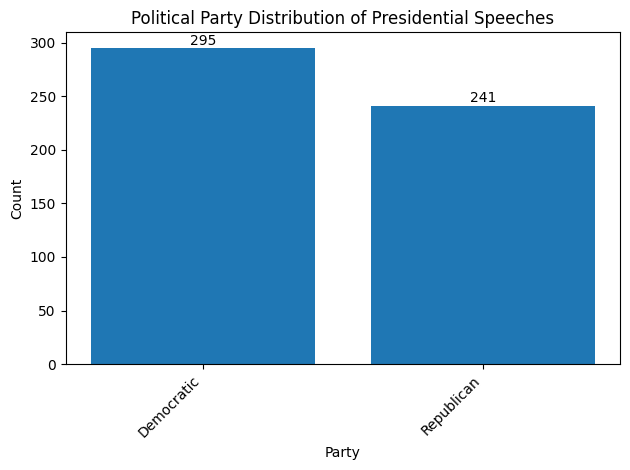

In [8]:
#visualize!
# Create a bar graph of the political party distribution
party_counts = final['Party'].value_counts()

# Plotting the bar graph
plt.bar(party_counts.index, party_counts.values)
plt.title('Political Party Distribution of Presidential Speeches')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# add count to top of each bar
for i, count in enumerate(party_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
rep_speeches

,Date,President,Party,Speech Title,Transcript,Decade,Truncated Transcript,Docs
330,1920-01-20,Warren G. Harding,Republican,Americanism,"My countrymen, the first flaming torch of Amer...",1920,"My countrymen , the first flaming torch of Ame...","(My, countrymen, ,, the, first, flaming, torch..."
331,1920-05-14,Warren G. Harding,Republican,Readjustment,"My countrymen, there isn't anything the matter...",1920,"My countrymen , there is n't anything the matt...","(My, countrymen, ,, there, is, n't, anything, ..."
332,1920-06-12,Warren G. Harding,Republican,Speech Accepting the Republican Nomination,"Chairman Lodge, Members of the Notification Co...",1920,"Chairman Lodge , Members of the Notification C...","(Chairman, Lodge, ,, Members, of, the, Notific..."
333,1920-07-22,Warren G. Harding,Republican,Enduring Popular Government,"Mr. Chairman *, the message which you have for...",1920,"Mr. Chairman * , the message which you have fo...","(Mr., Chairman, *, ,, the, message, which, you..."
334,1920-07-22,Warren G. Harding,Republican,An Association of Nations,"My countrymen, we believe the unspeakable sorr...",1920,"My countrymen , we believe the unspeakable sor...","(My, countrymen, ,, we, believe, the, unspeaka..."
...,...,...,...,...,...,...,...,...
862,2019-01-19,Donald Trump,Republican,Remarks about the US Southern Border,"Just a short time ago, I had the honor of pres...",2010,"Just a short time ago , I had the honor of pre...","(Just, a, short, time, ago, ,, I, had, the, ho..."
863,2019-02-05,Donald Trump,Republican,State of the Union Address,"Madam Speaker, Mr. Vice President, Members of ...",2010,"Madam Speaker , Mr. Vice President , Members o...","(Madam, Speaker, ,, Mr., Vice, President, ,, M..."
864,2019-02-15,Donald Trump,Republican,Speech Declaring a National Emergency,"Thank you very much, everybody. Before we begi...",2010,"Thank you very much , everybody . Before we be...","(Thank, you, very, much, ,, everybody, ., Befo..."
865,2019-09-24,Donald Trump,Republican,Remarks at the United Nations General Assembly,"Thank you very much. Mr. President, Mr. Secret...",2010,"Thank you very much . Mr. President , Mr. Secr...","(Thank, you, very, much, ., Mr., President, ,,..."


In [ ]:
dem_speeches

,Date,President,Party,Speech Title,Transcript,Decade,Truncated Transcript,Docs
340,1920-12-07,Woodrow Wilson,Democratic,Eighth Annual Message,When I addressed myself to performing the duty...,1920,When I addressed myself to performing the duty...,"(When, I, addressed, myself, to, performing, t..."
389,1933-03-04,Franklin D. Roosevelt,Democratic,First Inaugural Address,"President Hoover, Mr. Chief Justice, my friend...",1930,"President Hoover , Mr. Chief Justice , my frie...","(President, Hoover, ,, Mr., Chief, Justice, ,,..."
390,1933-03-12,Franklin D. Roosevelt,Democratic,On the Banking Crisis,I want to talk for a few minutes with the peop...,1930,I want to talk for a few minutes with the peop...,"(I, want, to, talk, for, a, few, minutes, with..."
391,1933-05-07,Franklin D. Roosevelt,Democratic,On Progress During the First Two Months,On a Sunday night a week after my Inauguration...,1930,On a Sunday night a week after my Inauguration...,"(On, a, Sunday, night, a, week, after, my, Ina..."
392,1933-07-24,Franklin D. Roosevelt,Democratic,On the National Recovery Administration,After the adjournment of the historical specia...,1930,After the adjournment of the historical specia...,"(After, the, adjournment, of, the, historical,..."
...,...,...,...,...,...,...,...,...
843,2015-03-07,Barack Obama,Democratic,Remarks at the 50th Anniversary of the Selma M...,"UDIENCE MEMBER: We love you, President Obama! ...",2010,"UDIENCE MEMBER : We love you , President Obama...","(UDIENCE, MEMBER, :, We, love, you, ,, Preside..."
844,2015-06-26,Barack Obama,Democratic,Remarks in Eulogy for the Honorable Reverend C...,Giving all praise and honor to God. The Bible ...,2010,Giving all praise and honor to God . The Bible...,"(Giving, all, praise, and, honor, to, God, ., ..."
845,2016-01-12,Barack Obama,Democratic,2016 State of the Union Address,"Mr. Speaker, Mr. Vice President, Members of Co...",2010,"Mr. Speaker , Mr. Vice President , Members of ...","(Mr., Speaker, ,, Mr., Vice, President, ,, Mem..."
846,2016-03-22,Barack Obama,Democratic,Remarks to the People of Cuba,Thank you. Muchas gracias. Thank you so much. ...,2010,Thank you . Muchas gracias . Thank you so much...,"(Thank, you, ., Muchas, gracias, ., Thank, you..."


**RESEARCH QUESTION: TF-IDF**

In [9]:
# Assuming 'final' is your DataFrame and 'docs' is the column with pre-processed Spacy Doc objects
docs = final['Docs']

def tokenize_docs(doc):
    tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
    return [tok for tok in tokens if tok not in stop_words]

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)

# Fit the CountVectorizer to the data
X = count_vectorizer.fit_transform(docs)

# Convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names_out()) # this method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')
bow_df

Dataframe Shape: (536, 6530)


,$,-but,-for,-i,-in,-include,-is,-our,.—we,1,...,yoke,york,young,youngster,youth,yugoslavia,zeal,zealand,zero,zone
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
532,1,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,0,0,0
533,2,0,0,0,0,0,0,0,0,5,...,0,0,1,0,0,0,0,0,0,0
534,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0


In [21]:
# Initialize the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)
# Fit it to the data
X = tfidf_vectorizer.fit_transform(docs)
# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df

Dataframe Shape: (536, 6530)


,$,-but,-for,-i,-in,-include,-is,-our,.—we,1,...,yoke,york,young,youngster,youth,yugoslavia,zeal,zealand,zero,zone
0,0.000000,0.090077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.059784,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.028443,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
532,0.011154,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.017774,0.042453,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
533,0.022258,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049266,...,0.0,0.000000,0.010590,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
534,0.034681,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.011000,0.0,0.040925,0.0,0.0,0.000000,0.0,0.0


**VISUALIZING**

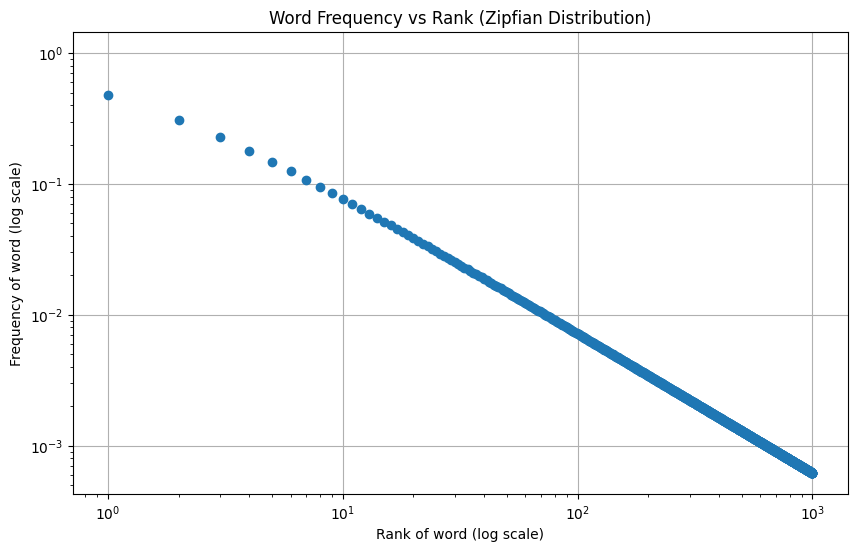

In [17]:
# Let's create a sample dataframe to mimic the bag-of-words dataframe 'bow_df'
# This sample will have word counts that roughly follow a Zipfian distribution
# We'll use this to visualize the Zipfian distribution

# Generating a Zipfian distribution for word counts
word_ranks = pd.Series(range(1, 1001))
word_counts = word_ranks.apply(lambda x: 1 / (x**1.07))  # Zipf's law exponent typically close to 1

# Mimicking a bag-of-words dataframe sum, where index is the word rank and the value is the word count
bow_df_sum = word_counts

# Now let's plot this as a log-log plot to better visualize the Zipfian distribution
plt.figure(figsize=(10,6))
plt.loglog(bow_df_sum.index, bow_df_sum.values, marker='o', linestyle='')
plt.xlabel('Rank of word (log scale)')
plt.ylabel('Frequency of word (log scale)')
plt.title('Word Frequency vs Rank (Zipfian Distribution)')
plt.grid(True)
plt.show()

The straight-line relationship observed in the plot indicates that a small number of words (towards the left on the x-axis, which have lower ranks) are used very frequently, and a large number of words (towards the right on the x-axis, which have higher ranks) are used infrequently. This is typical of natural language, where common words like "the", "is", and "and" are used very often, while most words are used much less often.

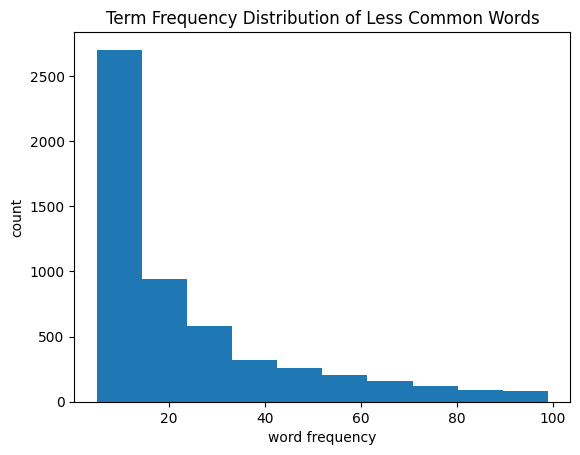

In [16]:
# Set a threshold for the maximum word frequency to consider
threshold = 100  # You can adjust this threshold to include less common words

# Filter the word frequencies to exclude those above the threshold
filtered_word_frequencies = bow_df.sum()[bow_df.sum() < threshold]

# Plot the histogram of word frequencies that are below the threshold
filtered_word_frequencies.plot.hist(bins=10)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution of Less Common Words')
plt.show()


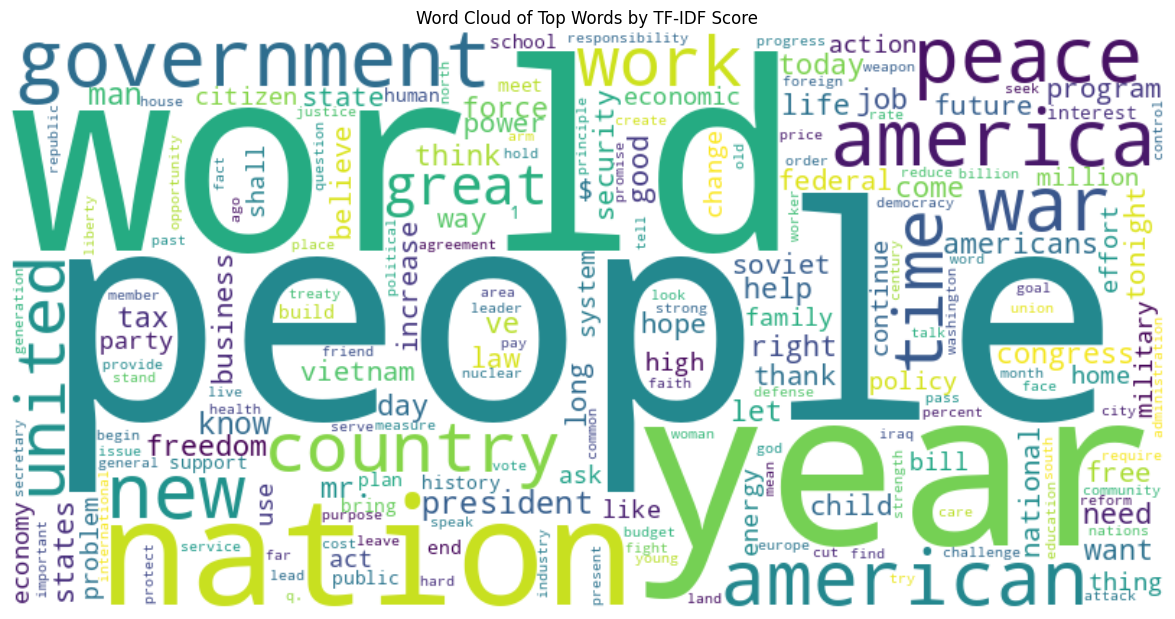

In [22]:
# Sum the TF-IDF scores for each term across all documents
word_tfidf_sum = tfidf_df.sum(axis=0)

# Convert the summed scores to a dictionary with words as keys and their scores as values
word_scores = word_tfidf_sum.to_dict()

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white')

# Generate the word cloud using the TF-IDF scores
wordcloud.generate_from_frequencies(word_scores)

# Display the generated image
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # turn off axis
plt.title('Word Cloud of Top Words by TF-IDF Score')
plt.show()


**MODELING**

In [ ]:
from sklearn.model_selection import train_test_split

seed = 57  # set your random seed

# Use the 'Docs' column, which contains pre-processed spaCy Doc objects
X = final['Docs']
ylabels = final['Party']  # the labels, or answers, we want to test against

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=seed)

# Convert the train and test splits from pandas series to lists
X_train = X_train.tolist()
X_test = X_test.tolist()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

classifier = LogisticRegression()

# When we are doing a multistep process in sklearn, it's best to set it up as a pipeline
pipe = Pipeline([('vectorizer', tfidf_vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, min_df=5, token_pattern=None,
                                 tokenizer=<function tokenize_docs at 0x7ff63d73fe20>)),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn import metrics

In [ ]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted, pos_label = 'Republican'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted, pos_label = 'Republican'))

Logistic Regression Accuracy: 0.7407407407407407
Logistic Regression Precision: 0.8181818181818182
Logistic Regression Recall: 0.5510204081632653


              precision    recall  f1-score   support

  Democratic       0.71      0.90      0.79        59
  Republican       0.82      0.55      0.66        49

    accuracy                           0.74       108
   macro avg       0.76      0.72      0.72       108
weighted avg       0.76      0.74      0.73       108



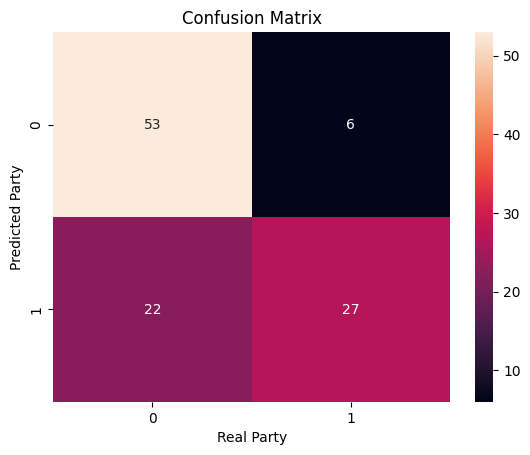

In [ ]:
# Check out a classification report
print(metrics.classification_report(y_test, predicted))

# We can also look at incorrect predictions in a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Real Party')
plt.ylabel('Predicted Party')
plt.show()

**RESEARCH QUESTION 2: SEMANTIC SIMILARITY**

In [18]:
# Filter the documents by party
dem_docs = final[final['Party'] == 'Democratic']['Docs'].tolist()
rep_docs = final[final['Party'] == 'Republican']['Docs'].tolist()

# Function to calculate similarities within a list of docs
def calculate_similarities(docs):
    similarities = []
    for i in range(len(docs) - 1):
        doc1 = docs[i]
        doc2 = docs[i + 1]
        # Compute similarity score between the two documents, ensure both docs are not empty
        if doc1.has_vector and doc2.has_vector:
            similarity_score = doc1.similarity(doc2)
            similarities.append(similarity_score)
            print(f"Similarity between document {i} and document {i + 1}: {similarity_score}")
    return similarities

# Calculate similarities for each party
doc_similarity_dem = calculate_similarities(dem_docs)
doc_similarity_rep = calculate_similarities(rep_docs)



<ipython-input-18-06b3613b1bd4>:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_score = doc1.similarity(doc2)


Similarity between document 0 and document 1: 0.9627038469364748
Similarity between document 1 and document 2: 0.9702860487614666
Similarity between document 2 and document 3: 0.979088252460894
Similarity between document 3 and document 4: 0.9902276756396643
Similarity between document 4 and document 5: 0.9843870738976042
Similarity between document 5 and document 6: 0.9758173912042073
Similarity between document 6 and document 7: 0.9864372533743752
Similarity between document 7 and document 8: 0.9828992162411335
Similarity between document 8 and document 9: 0.963094715614241
Similarity between document 9 and document 10: 0.9605534964280165
Similarity between document 10 and document 11: 0.9674676018677112
Similarity between document 11 and document 12: 0.9820198502820586
Similarity between document 12 and document 13: 0.9419248589915962
Similarity between document 13 and document 14: 0.9359650666852014
Similarity between document 14 and document 15: 0.9701227370071422
Similarity betwe

In [19]:
# Calculate and print the overall semantic similarity
dem_overall_similarity = sum(doc_similarity_dem) / len(doc_similarity_dem)
print(f"This is the overall semantic similarity between the documents by a Democratic president: {dem_overall_similarity}")

This is the overall semantic similarity between the documents by a Democratic president: 0.9518172716805525


In [20]:
# Calculate and print the overall semantic similarity
rep_overall_similarity = sum(doc_similarity_rep) / len(doc_similarity_rep)
print(f"This is the overall semantic similarity between the documents by a Republican president: {rep_overall_similarity}")

This is the overall semantic similarity between the documents by a Republican president: 0.9435467305377796


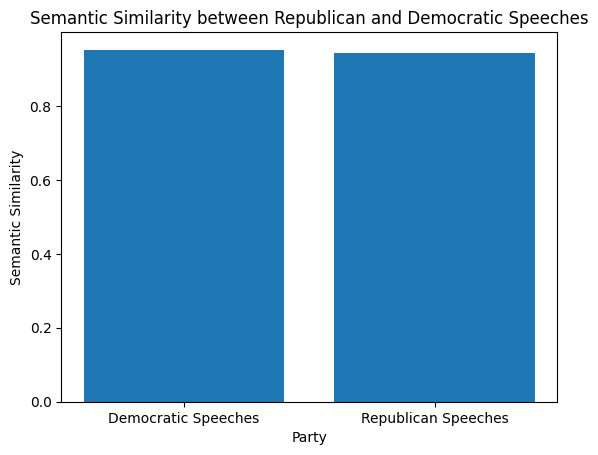

In [21]:
# prompt: give me a visual to see the semantic similarity between republican and democratic speeches

# Create a bar chart to compare the semantic similarity between Republican and Democratic speeches
labels = ['Democratic Speeches', 'Republican Speeches']
values = [dem_overall_similarity, rep_overall_similarity]

plt.bar(labels, values)
plt.xlabel('Party')
plt.ylabel('Semantic Similarity')
plt.title('Semantic Similarity between Republican and Democratic Speeches')
plt.show()


In [ ]:
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(doc_similarity_dem, doc_similarity_rep, equal_var=False)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in semantic similarity between Democratic and Republican speeches.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in semantic similarity between Democratic and Republican speeches.")

t-statistic: 2.498458178927407
p-value: 0.01287798897816923
Reject the null hypothesis: There is a significant difference in semantic similarity between Democratic and Republican speeches.
